In [208]:
# import libraries for data and plotting
import glob, os
import pandas as pd
import numpy as np
import scipy
from matplotlib import pyplot, animation
import plotly.graph_objects as go
import plotly.express as px
import datetime

In [78]:
# importing data
dataDir = '../data/csse_covid_19_data/csse_covid_19_daily_reports/'
allFiles = sorted(glob.glob(dataDir+'/*.csv'))
dates = [ path ]
dfs = []
# saving files in list and creating date column
for path in allFiles:
    df = pd.read_csv(path)
    date = path[len(path) - 14: len(path) - 4]
    df['Date'] = date
    df['Date'] = pd.to_datetime(df['Date'])
    dfs.append(df)

In [209]:
# importing data for daily cases, extract data for KG
dailyCases = pd.read_csv('../data/daily-cases-covid-19.csv')

dfKg = dailyCases[dailyCases['Entity'] == 'Kyrgyzstan']
dfKg.index = range(1,len(dfKg)+1)
dfKg = dfKg.rename(columns={'Daily confirmed cases (cases)': 'Cases'})

In [223]:
# plot some figures
nCases = list(dfKg['Cases'])
totalEachDay = [0]*len(nCases)
totalEachDay[0] = nCases[0]
for i in range(1,len(nCases)):
    totalEachDay[i] = totalEachDay[i-1]+ nCases[i]
days = list(dfKg['Date'])
dfKg['Total'] = totalEachDay

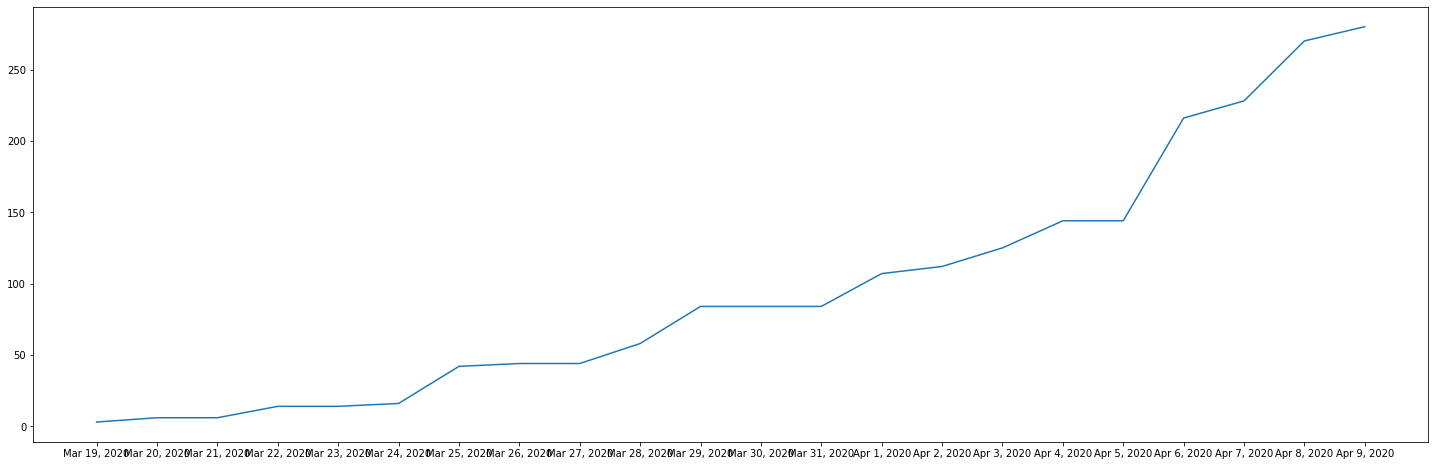

In [243]:
fig, ax = pyplot.subplots()
x = days
figure = pyplot.gcf()
figure.set_size_inches(25,8)
line, = ax.plot(x, totalEachDay)

pyplot.show()